In [121]:
import numpy as np
import pandas as pd

def read_idx(filename):
    with open(filename, 'rb') as f:
        magic = np.frombuffer(f.read(4), dtype='>i4')[0]
        num_dimensions = (magic & 0xFF)
        shape = np.frombuffer(f.read(num_dimensions * 4), dtype='>i4')
        data = np.frombuffer(f.read(), dtype=np.uint8)
        return data.reshape(shape)

# Paths to the MNIST files
images_path =r"C:\Users\IDRESS COMPUTERS\Desktop\Training sets\train-images.idx3-ubyte"
labels_path =r"C:\Users\IDRESS COMPUTERS\Desktop\Training sets\train-labels.idx1-ubyte"

# Read the images and labels
images = read_idx(images_path)
labels = read_idx(labels_path)

# Convert to DataFrame
images_df = pd.DataFrame(images.reshape(images.shape[0], -1))  # Flatten the images
labels_df = pd.DataFrame(labels)

# Combine images and labels into one DataFrame
mnist_df = pd.concat([labels_df, images_df], axis=1)
mnist_df.columns = ['Label'] + [f'Pixel_{i}' for i in range(images_df.shape[1])]



In [122]:
mnist_df
pixels = pd.DataFrame(mnist.data)
labels = pd.DataFrame(mnist.target)

In [123]:
pixels.loc[0].values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [135]:
labels.iloc[0].values

['5']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

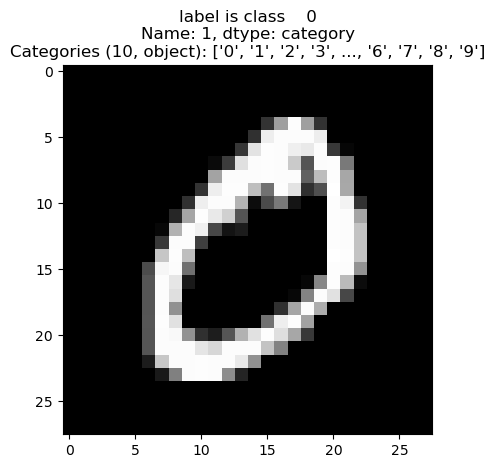

In [125]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
label = labels.iloc[1]
pixel = pixels.iloc[1]
pixel = np.array(pixel,dtype='uint8')
pixel = pixel.reshape((28,28))
plt.title('label is {label}'.format(label=label))
plt.imshow(pixel, cmap='gray')

In [126]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(mnist.data,mnist.target,test_size = 1/7.0)

In [127]:
X_test.shape

(10000, 784)

In [128]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [129]:
y_pred = model.predict(X_test)


In [130]:
model.score(X_test,y_test)

0.9715

In [131]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9715

In [132]:
y_test.head()

11982    1
21113    6
38082    9
32416    7
36296    4
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [136]:
y_predicted = model.predict(np.array(X_test.iloc[1]).reshape(1,-1))

C:\Users\IDRESS COMPUTERS\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


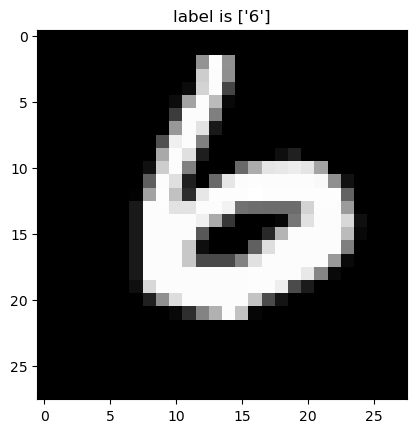

In [138]:

label = y_predicted
pixel = X_test.iloc[1]
pixel = np.array(pixel,dtype='uint8')
pixel = pixel.reshape((28,28))
plt.title('label is {label}'.format(label=label))
plt.imshow(pixel, cmap='gray')

In [139]:
import joblib

In [ ]:
filename = 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from joblib import load
from PIL import Image

# Load your trained model
model = load('your_trained_model.pkl')  # Update with your model path

def preprocess_image(image):
    """Preprocess the input image for the model."""
    # Resize to 28x28 and convert to grayscale
    image = image.resize((28, 28)).convert('L')  
    # Convert to numpy array and flatten
    image_array = np.array(image).reshape(-1)
    # Normalize or scale if necessary
    # image_array = image_array / 255.0  # Uncomment if your model expects normalized data
    return image_array

def predict_and_visualize(new_image):
    """Predict the label and visualize the image."""
    # Preprocess the input image
    processed_image = preprocess_image(new_image)

    # Make prediction
    label = model.predict(processed_image.reshape(1, -1))[0]

    # Reshape image for visualization
    pixel = np.array(processed_image, dtype='uint8').reshape((28, 28))

    # Plot the image
    plt.title(f'Predicted Label: {label}')
    plt.imshow(pixel, cmap='gray')
    plt.axis('off')  # Hide axis
    plt.show()

def load_image_from_file(file_path):
    """Load an image from file."""
    return Image.open(file_path)

# Example usage:
# Load an image file (update the path)
file_path = 'path/to/your/image.png'  # Replace with your image path
new_input_image = load_image_from_file(file_path)

# Call the function to predict and visualize
predict_and_visualize(new_input_image)